<a href="https://www.kaggle.com/code/arihanttanwar/feature-selector-comparison?scriptVersionId=104079463" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **COMPARISON OF FEATURE SELECTION METHODS**

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression

In [2]:
data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
data.shape

(1460, 81)

In [3]:
#for simplicity numerical variables are used
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [4]:
# separate train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

x_train.shape, x_test.shape

((1022, 37), (438, 37))

In [5]:
#remove correlated features
def correlation(data,threshold):
    mat = data.corr()
    corr_cols = set()
    for i in range(len(mat.columns)):
        for j in range(i):
            if abs(mat.iloc[i,j])>threshold:
                corr_cols.add(mat.columns[i])
    return corr_cols

cols = correlation(x_train,0.8)
cols

{'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'}

In [6]:
#dropping highly correlated columns
x_train.drop(labels=list(cols),axis=1,inplace=True)
x_test.drop(labels=list(cols),axis=1,inplace=True)
x_train.fillna(0,inplace=True)
x_test.fillna(0,inplace=True)

## **Comparison of wrapper methods**

### **1. Forward selection**

In [7]:
forward = SFS(
    RandomForestRegressor(),
    k_features = 10,
    forward = True,
    scoring = 'r2',
    verbose = 2,
    cv = 3
)
forward = forward.fit(np.array(x_train),y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   15.6s finished

[2022-08-24 07:47:50] Features: 1/10 -- score: 0.6661112378895994[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   15.9s finished

[2022-08-24 07:48:06] Features: 2/10 -- score: 0.7208203060056612[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   16.4s finished

[2022-08-24 07:48:23] Features: 3/10 -- score: 0.7451643717833903[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [8]:
forward_cols = x_train.columns[list(forward.k_feature_idx_)]
pd.DataFrame(forward_cols)

,0
0,OverallQual
1,YearBuilt
2,BsmtFinSF1
3,2ndFlrSF
4,GrLivArea
5,BsmtFullBath
6,BsmtHalfBath
7,FullBath
8,BedroomAbvGr
9,GarageCars


### **2. Backward elimination**

In [9]:
backward = SFS(
    RandomForestRegressor(),
    k_features = 10,
    forward = False,
    floating = False,
    scoring = 'r2',
    verbose = 2,
    cv = 3
)
backward = backward.fit(np.array(x_train),y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:  1.2min finished

[2022-08-24 07:51:54] Features: 33/10 -- score: 0.8581786627227276[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  1.1min finished

[2022-08-24 07:53:01] Features: 32/10 -- score: 0.8597347806978592[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:  1.0min finished

[2022-08-24 07:54:03] Features: 31/10 -- score: 0.8590767979168278[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [10]:
backward_cols = x_train.columns[list(backward.k_feature_idx_)]
pd.DataFrame(backward_cols)

,0
0,LotArea
1,OverallQual
2,OverallCond
3,YearBuilt
4,MasVnrArea
5,BsmtFinSF1
6,2ndFlrSF
7,GrLivArea
8,GarageCars
9,OpenPorchSF


### **3. Recursive elimination**

In [11]:
# Taking too long 
#Infeasible for such large set of features

#recursive = EFS(
#     RandomForestRegressor(), 
#     min_features=2,
#     max_features=4,
#     scoring='r2',
#     print_progress=True,
#     cv=3
# )

# recursive = recursive.fit(np.array(x_train),y_train)

### **Comparing set of features**

In [12]:
#defining the dataset
x_train_f = pd.DataFrame(x_train[forward_cols])
x_test_f = pd.DataFrame(x_test[forward_cols])
x_train_b = pd.DataFrame(x_train[backward_cols])
x_test_b = pd.DataFrame(x_test[backward_cols])

print(x_train_f.shape,x_test_f.shape,x_train_b.shape,x_test_b.shape)

(1022, 10) (438, 10) (1022, 10) (438, 10)


In [13]:
model_f = RandomForestRegressor()
model_b = RandomForestRegressor()

model_f.fit(x_train_f,y_train)
model_b.fit(x_train_b,y_train)

predict_f = model_f.predict(x_test_f)
predict_b = model_b.predict(x_test_b)

### **Calculating error**

In [14]:
rscore_f = r2_score(predict_f,y_test)
rscore_b = r2_score(predict_b,y_test)

print(f"Forward r2_score = {rscore_f}\nBackward r2_score = {rscore_b}")

Forward r2_score = 0.8444410618909024
Backward r2_score = 0.8208330155865753


#### Backward elimination outperforms forward substitution by slight difference

## **Comparison of filter methods**

### **1. F regression**

In [15]:
f_regression = SelectKBest(f_regression,k=10).fit(x_train,y_train)

In [16]:
f_regression_cols = f_regression.get_feature_names_out()
pd.DataFrame(f_regression_cols)

,0
0,OverallQual
1,YearBuilt
2,YearRemodAdd
3,MasVnrArea
4,TotalBsmtSF
5,1stFlrSF
6,GrLivArea
7,FullBath
8,Fireplaces
9,GarageCars


### **2. Mutual info regression**

In [17]:
mutual_info = SelectKBest(mutual_info_regression,k=10).fit(x_train,y_train)

In [18]:
mutual_info_cols = mutual_info.get_feature_names_out()
pd.DataFrame(mutual_info_cols)

,0
0,MSSubClass
1,OverallQual
2,YearBuilt
3,YearRemodAdd
4,TotalBsmtSF
5,1stFlrSF
6,2ndFlrSF
7,GrLivArea
8,FullBath
9,GarageCars


### **Comparing set of features**

In [19]:
#defining the dataset
x_train_f_regression = pd.DataFrame(x_train[f_regression_cols])
x_test_f_regression = pd.DataFrame(x_test[f_regression_cols])

x_train_mutual_info = pd.DataFrame(x_train[mutual_info_cols])
x_test_mutual_info = pd.DataFrame(x_test[mutual_info_cols])

In [20]:
x_test_f_regression.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars
529,6,1957,1975,0.0,2035,2515,2515,3,2,2
491,6,1941,1950,0.0,806,958,1578,1,2,1
459,5,1950,1950,161.0,709,979,1203,1,1,1
279,7,1977,1977,299.0,1160,1156,2022,2,1,2
655,6,1971,1971,381.0,525,525,1092,1,0,1


In [21]:
model_f_regression = RandomForestRegressor()
model_mutual_info = RandomForestRegressor()

model_f_regression.fit(x_train_f_regression,y_train)
model_mutual_info.fit(x_train_mutual_info,y_train)

prediction_f_regression = model_f_regression.predict(x_test_f_regression)
prediction_mutual_info = model_mutual_info.predict(x_test_mutual_info)

### **Calculating error**

In [22]:
r2_f_regression = r2_score(prediction_f_regression,y_test)
r2_mutual_info = r2_score(prediction_mutual_info,y_test)
print(f"F regression r2_score = {r2_f_regression}\nMutual info r2_score = {r2_mutual_info}")

F regression r2_score = 0.8134890374609148
Mutual info r2_score = 0.8492915988381311


### Mutual info outperforms

## **Overall comparison of all methods**

,Model,R score
0,forward selection,84.444106
1,backward elimination,82.083302
2,forward regression,81.348904
3,mutual info,84.929160


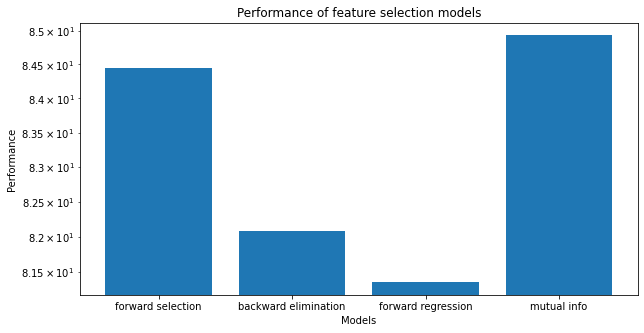

In [33]:
#percent score of each
f_sel = rscore_f*100
b_eli = rscore_b*100
f_reg = r2_f_regression*100
m_inf = r2_mutual_info*100

fig = plt.figure(figsize=(10,5))
scores = [f_sel,b_eli,f_reg,m_inf]
label = ['forward selection','backward elimination','forward regression','mutual info']

plt.bar(label,scores,log=True)   #using logarithmic scale for observable difference
plt.xlabel('Models')
plt.ylabel('Performance')
plt.title('Performance of feature selection models')

pd.DataFrame({
    'Model':label,
    'R score':scores
})